In [1]:
import sys
sys.path.append('../')
import mobipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mobipy.plotting as mplt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
app = mobipy.Model_Application.build_from_model_and_data_file('../models/nivafjord_simplycnp_model.txt', 
                                                              '../models/data/NIVAFjord/nivafjord_drammen.dat')

Overriding property "Cloud cover" with an input series.
Overriding property "Air pressure" with an input series.
In file ../models/data/NIVAFjord/nivafjord_drammen.dat line 183 column 5:
The model "NIVAFjord-SimplyCNP" does not contain a module named "NIVAFjord tracer test". This data block will be ignored.

In file ../models/data/NIVAFjord/nivafjord_drammen.dat line 399 column 5:
The model "NIVAFjord-SimplyCNP" does not contain a module named "SimplyC". This data block will be ignored.

In file ../models/data/NIVAFjord/nivafjord_drammen.dat line 639 column 5:
The model "NIVAFjord-SimplyCNP" does not contain a module named "Simply organic C-N". This data block will be ignored.

In file ../models/data/NIVAFjord/nivafjord_drammen.dat line 756 column 5:
The model "NIVAFjord-SimplyCNP" does not contain a module named "Simply organic C-P". This data block will be ignored.

The module argument 'zoo' was never referenced.



In [3]:
# Set parameter values and run the model
app.start_date[()] = '2018-01-01'
app.end_date[()] = '2019-12-01'
app.run()

True

In [4]:
# Extract slices of the temperature and salinity results.
temp, dates = app.layer.water.temp["Drammensfjorden", :18]
sal,  dates = app.layer.water.salinity["Drammensfjorden", :18]

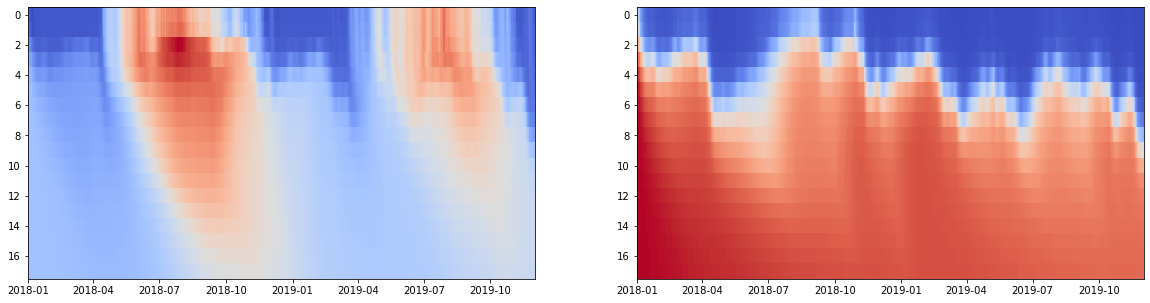

In [9]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 5))
ys = range(temp.shape[1])
mplt.quick_heatmap(ax0, temp, dates, ys)
mplt.quick_heatmap(ax1, sal, dates, ys)

Text(0, 0.5, '[m³ s⁻¹]')

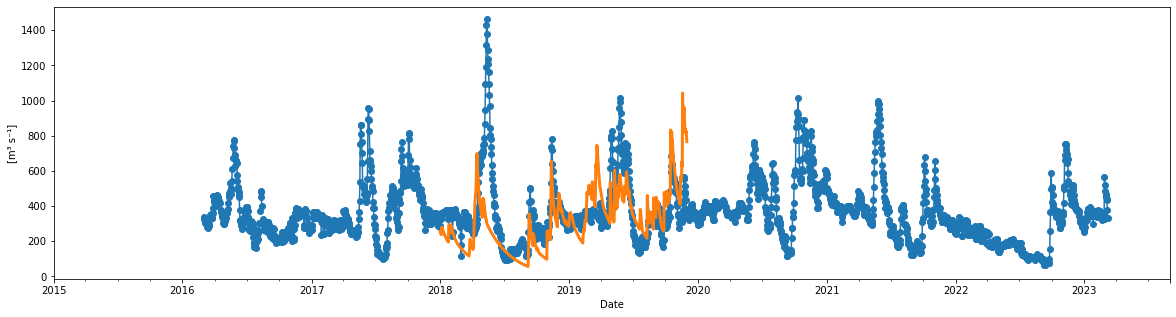

In [10]:
modq = app.var("River discharge to fjord")
obsq = app.var("Obs Q Mjondalen")
fig, ax = plt.subplots(1, figsize=(20, 5))
obsq[()].plot(ax = ax, marker='o')
modq["Drammenselva"].plot(ax = ax, linewidth=3)
ax.set_ylabel('[' + obsq.unit() + ']')